## 0. Chargement des données

In [28]:
import pandas as pd

# Charger les données
synthetic_pricing_data_path = "synthetic_pricing_data_calibrated.csv"
df_synthetic_pricing_data = pd.read_csv(synthetic_pricing_data_path)

# Afficher les premières lignes des données
df_synthetic_pricing_data.head()

,index,order_requests,city_x,date,language,mobile,avatar_id,hotel_id,stock,group,brand,parking,pool,children_policy,price
0,0,1,8,21,6.0,0,1,161,46,2,1,1,0,0,204.835708
1,1,1,8,21,6.0,0,1,187,32,1,2,1,1,0,223.086785
2,2,1,8,21,6.0,0,1,279,12,0,0,1,0,0,292.384427
3,3,1,8,21,6.0,0,1,395,10,1,3,0,0,0,326.151493
4,4,1,8,21,6.0,0,1,488,42,1,3,1,1,1,218.292331


### Restreindre la variable price à deux chiffres après la virgule

In [29]:
df_synthetic_pricing_data["price"] = df_synthetic_pricing_data["price"].round(2)

In [30]:
df_synthetic_pricing_data.shape

(6644, 15)

In [31]:
df_synthetic_pricing_data.isnull().sum()

index                0
order_requests       0
city_x               0
date                 0
language           134
mobile               0
avatar_id            0
hotel_id             0
stock                0
group                0
brand                0
parking              0
pool                 0
children_policy      0
price                0
dtype: int64

In [32]:
df_synthetic_pricing_data[df_synthetic_pricing_data['language'].isnull()]

,index,order_requests,city_x,date,language,mobile,avatar_id,hotel_id,stock,group,brand,parking,pool,children_policy,price
117,117,13,2,1,NaN,1,5,131,1,1,3,1,1,0,361.57
118,118,13,2,1,NaN,1,5,258,1,1,3,0,0,1,397.14
119,119,13,2,1,NaN,1,5,265,6,1,3,0,1,0,377.60
120,120,13,2,1,NaN,1,5,370,4,3,3,0,0,0,349.55
121,121,13,2,1,NaN,1,5,418,0,2,1,1,0,0,334.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6025,6025,767,5,21,NaN,1,751,899,21,1,2,0,0,0,155.83
6258,6258,798,5,6,NaN,0,379,459,6,3,2,0,0,0,239.83
6259,6259,798,5,6,NaN,0,379,470,5,0,0,0,0,0,283.43
6260,6260,798,5,6,NaN,0,379,653,6,1,1,1,0,0,390.82


In [33]:
df_synthetic_pricing_data.head()

,index,order_requests,city_x,date,language,mobile,avatar_id,hotel_id,stock,group,brand,parking,pool,children_policy,price
0,0,1,8,21,6.0,0,1,161,46,2,1,1,0,0,204.84
1,1,1,8,21,6.0,0,1,187,32,1,2,1,1,0,223.09
2,2,1,8,21,6.0,0,1,279,12,0,0,1,0,0,292.38
3,3,1,8,21,6.0,0,1,395,10,1,3,0,0,0,326.15
4,4,1,8,21,6.0,0,1,488,42,1,3,1,1,1,218.29


In [34]:
df_synthetic_pricing_data['language'].fillna(1, inplace=True)

C:\Users\oba3994\AppData\Local\Temp\ipykernel_15492\4051408567.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_synthetic_pricing_data['language'].fillna(1, inplace=True)


In [35]:
df_synthetic_pricing_data.isnull().sum()

index              0
order_requests     0
city_x             0
date               0
language           0
mobile             0
avatar_id          0
hotel_id           0
stock              0
group              0
brand              0
parking            0
pool               0
children_policy    0
price              0
dtype: int64

In [36]:
df_synthetic = df_synthetic_pricing_data.drop(columns=["index", "hotel_id", "avatar_id"])  # Supprimer les identifiants inutiles

In [37]:
df_synthetic.head()

,order_requests,city_x,date,language,mobile,stock,group,brand,parking,pool,children_policy,price
0,1,8,21,6.0,0,46,2,1,1,0,0,204.84
1,1,8,21,6.0,0,32,1,2,1,1,0,223.09
2,1,8,21,6.0,0,12,0,0,1,0,0,292.38
3,1,8,21,6.0,0,10,1,3,0,0,0,326.15
4,1,8,21,6.0,0,42,1,3,1,1,1,218.29


Résultats des tests ANOVA :
                 F-statistic        p-value
pool              824.925752  4.160422e-171
brand             264.450145  3.916394e-162
group             203.704301  2.143720e-126
parking           118.141505   2.737374e-27
city_x             18.084856   5.149848e-27
mobile             85.694628   2.779529e-20
children_policy    39.502847   8.818162e-18
language            5.822400   8.626491e-09


C:\Users\oba3994\AppData\Local\Temp\ipykernel_15492\1862999865.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], y=df["price"], palette="coolwarm")


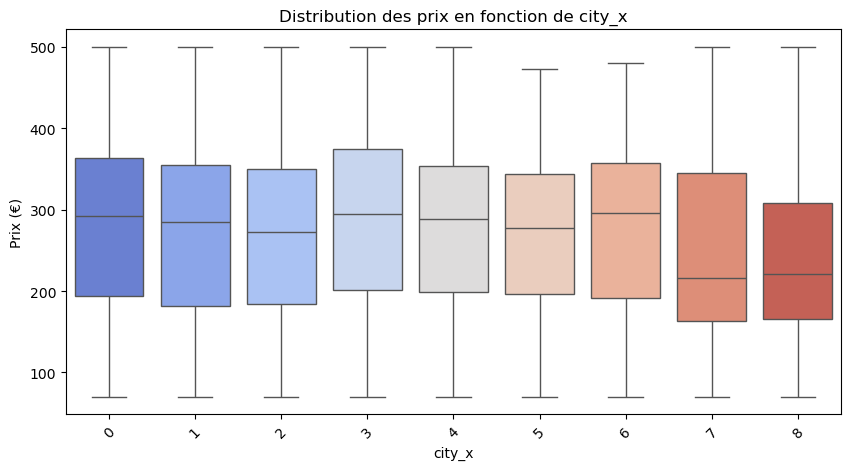

C:\Users\oba3994\AppData\Local\Temp\ipykernel_15492\1862999865.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], y=df["price"], palette="coolwarm")


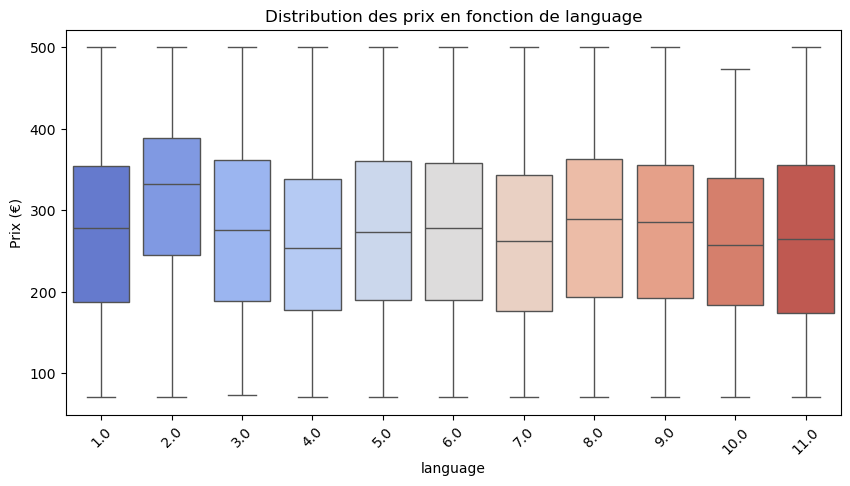

C:\Users\oba3994\AppData\Local\Temp\ipykernel_15492\1862999865.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], y=df["price"], palette="coolwarm")


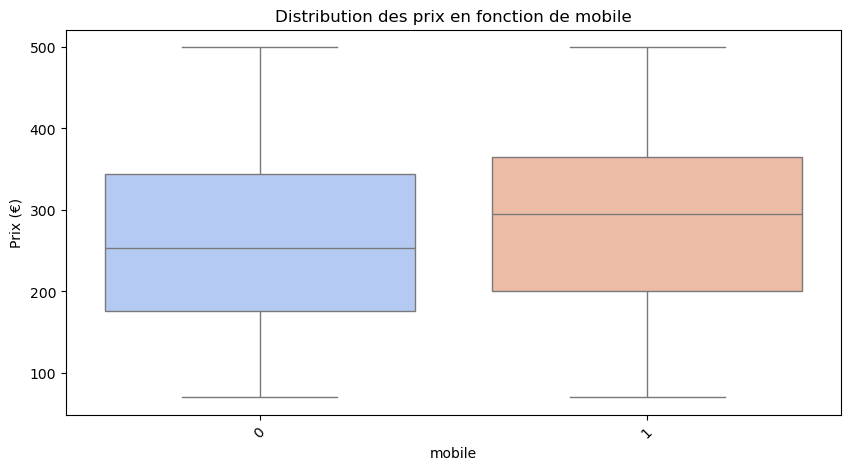

C:\Users\oba3994\AppData\Local\Temp\ipykernel_15492\1862999865.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], y=df["price"], palette="coolwarm")


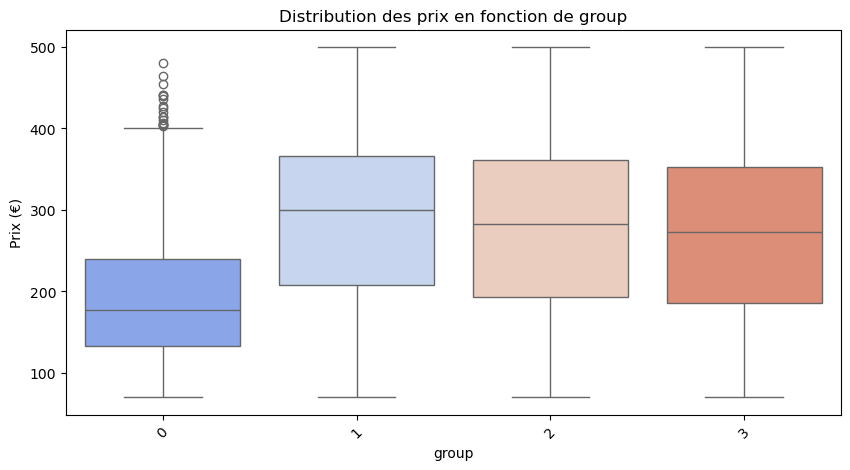

C:\Users\oba3994\AppData\Local\Temp\ipykernel_15492\1862999865.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], y=df["price"], palette="coolwarm")


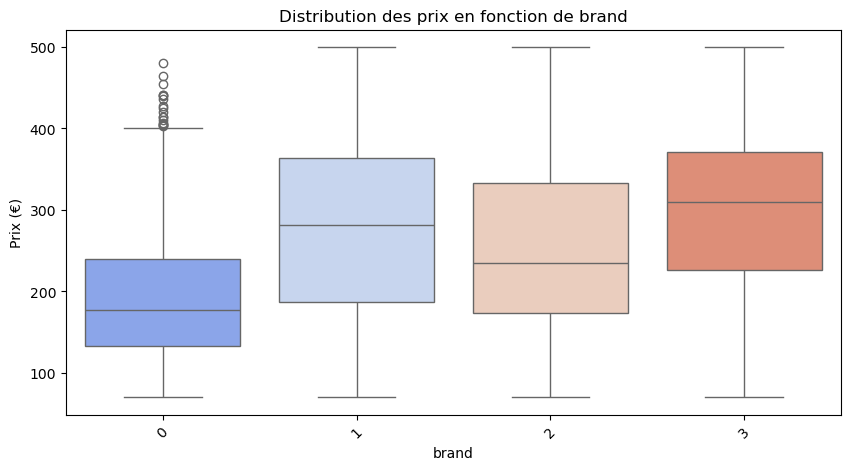

C:\Users\oba3994\AppData\Local\Temp\ipykernel_15492\1862999865.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], y=df["price"], palette="coolwarm")


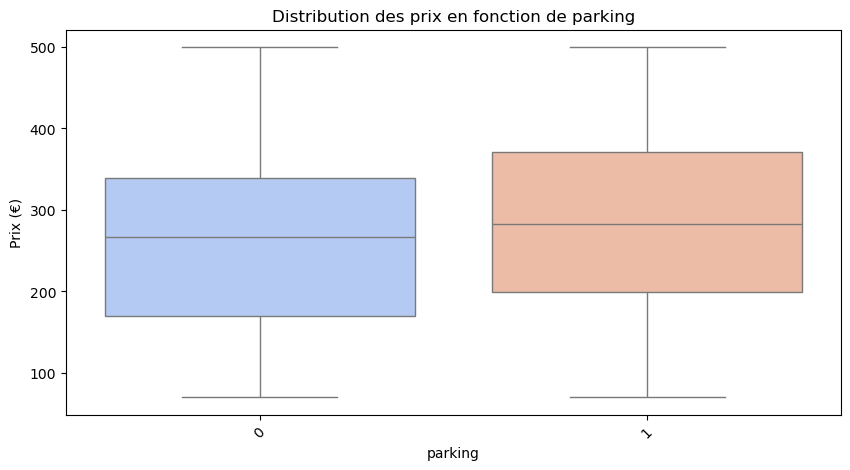

C:\Users\oba3994\AppData\Local\Temp\ipykernel_15492\1862999865.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], y=df["price"], palette="coolwarm")


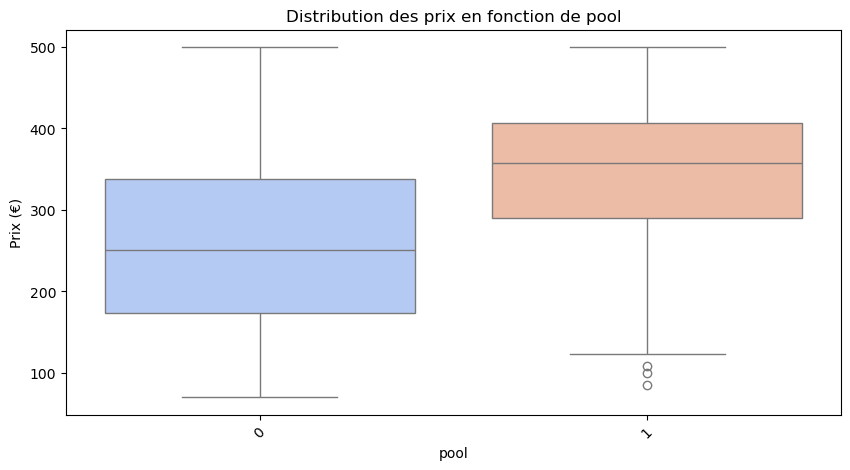

C:\Users\oba3994\AppData\Local\Temp\ipykernel_15492\1862999865.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], y=df["price"], palette="coolwarm")


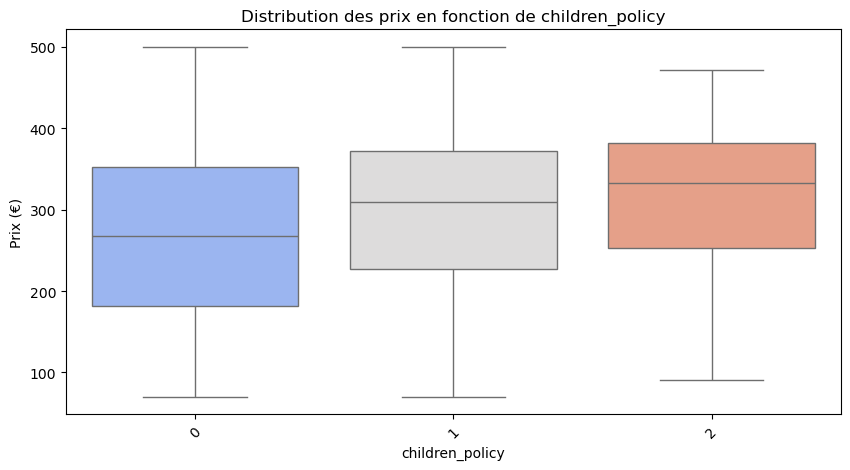

In [38]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = df_synthetic

# Liste des variables catégorielles
categorical_vars = ["city_x", "language", "mobile", "group", "brand", "parking", "pool", "children_policy"]

# Effectuer des tests ANOVA pour voir l'impact des variables catégorielles sur le prix
anova_results = {}
for var in categorical_vars:
    groups = [df["price"][df[var] == level] for level in df[var].unique()]
    anova_results[var] = stats.f_oneway(*groups)

# Afficher les résultats des tests ANOVA
anova_df = pd.DataFrame.from_dict(anova_results, orient='index', columns=['F-statistic', 'p-value'])
anova_df.sort_values(by='p-value', inplace=True)

print("Résultats des tests ANOVA :")
print(anova_df)

# Visualisation de l'impact des variables catégorielles sur le prix
for var in categorical_vars:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[var], y=df["price"], palette="coolwarm")
    plt.title(f"Distribution des prix en fonction de {var}")
    plt.xlabel(var)
    plt.ylabel("Prix (€)")
    plt.xticks(rotation=45)
    plt.show()

# 📊 Analyse des résultats des tests ANOVA sur les variables catégorielles

L'ANOVA a été réalisée pour évaluer l'impact des variables catégorielles sur le **prix des hôtels**. Voici une analyse des résultats :

## 🔍 Interprétation des valeurs F-statistic et p-value
- **F-statistic** : Plus elle est élevée, plus la variable a un effet important sur la variation du prix.
- **p-value** : Si elle est inférieure à **0.05**, l'effet de la variable est significatif.

| Variable          | F-statistic | p-value | Influence sur le prix |
|------------------|------------|-----------------|------------------|
| **Piscine (pool)**  | **824.92** | **4.16e-171** | Très forte influence |
| **Marque (brand)** | **264.45** | **3.91e-162** | Très forte influence |
| **Groupe (group)** | **203.70** | **2.14e-126** | Forte influence |
| **Parking**       | **118.14** | **2.73e-27**  | Influence modérée |
| **Ville (city_x)** | **18.08** | **5.14e-27**  | Influence modérée |
| **Mobile**        | **85.69** | **2.77e-20**  | Influence faible |
| **Politique enfants (children_policy)** | **39.50** | **8.81e-18** | Influence faible |
| **Langue (language)** | **5.82** | **8.62e-09** | Influence très faible |

## 🎯 Principales conclusions
1. **Les équipements influencent fortement les prix** :
   - **Piscine et Parking** : Les hôtels avec une piscine ont un prix nettement plus élevé. Le parking a également un effet, mais moins prononcé.
   
2. **L’image de marque joue un rôle clé** :
   - **Les marques et les groupes hôteliers influencent fortement les prix**. Certains groupes/marques haut de gamme proposent des prix plus élevés.

3. **La ville a un effet modéré** :
   - Certaines villes peuvent avoir des prix moyens plus élevés, mais ce n’est pas la variable la plus influente.

4. **Autres facteurs avec une influence plus faible** :
   - **Réservation via mobile** : L’impact est faible, mais une différence existe.
   - **Politique enfants** : Peu d’impact significatif sur le prix.
   - **Langue** : Impact très faible, suggérant que la langue du client n'affecte pas significativement les prix.

🔍 Ces résultats permettent de mieux comprendre **les facteurs qui influencent le prix des hôtels**, aidant ainsi à affiner la stratégie de modélisation. 🚀

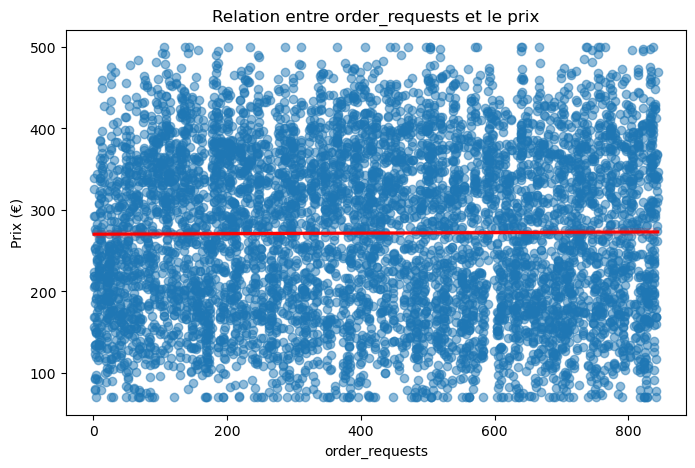

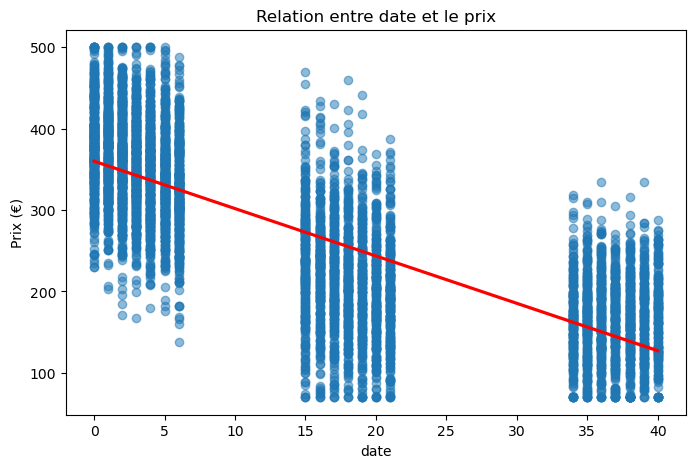

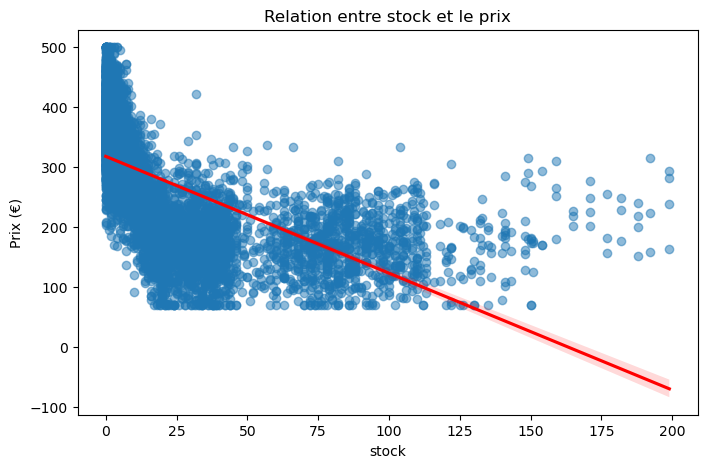

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Création des graphiques de dispersion avec régression
continuous_vars = ['order_requests', 'date', 'stock']

df_merged = df_synthetic

for var in continuous_vars:
    plt.figure(figsize=(8, 5))
    sns.regplot(x=df_merged[var], y=df_merged['price'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f"Relation entre {var} et le prix")
    plt.xlabel(var)
    plt.ylabel("Prix (€)")
    plt.show()

In [40]:
# Tests de corrélation de Pearson
correlation_results = {}
for var in continuous_vars:
    corr, p_value = stats.pearsonr(df_merged[var], df_merged['price'])
    correlation_results[var] = {"corrélation": corr, "p-value": p_value}

# Affichage des résultats
import pandas as pd
correlation_df = pd.DataFrame.from_dict(correlation_results, orient='index')
correlation_df.head()

,corrélation,p-value
order_requests,0.007976,0.5157
date,-0.777955,0.0000
stock,-0.616126,0.0000


# 📊 **Analyse des Résultats de la Corrélation entre les Variables Continues et le Prix des Hôtels**  

| Variable          | Corrélation | p-value  | Interprétation |
|------------------|-------------|----------|--------------------------------------------------------------|
| **order_requests** | 0.0079       | 0.5157   | Pas de corrélation significative avec le prix (p > 0.05). |
| **date**          | -0.7779      | 0.0000   | Corrélation négative forte : plus la date de réservation est proche, plus le prix est bas. |
| **stock**         | -0.6161      | 0.0000   | Corrélation négative modérée : plus il y a de chambres disponibles, plus le prix est bas. |

---

## 🧐 **Interprétation détaillée :**  

### 1️⃣ `order_requests` (Nombre de demandes de réservation)
- **Corrélation très faible (0.0079)** et **p-value élevée (0.5157)**.
- Aucune relation significative avec le prix des hôtels.
- **Conclusion :** Cette variable **n’impacte pas** la tarification.

### 2️⃣ `date` (Jours avant la réservation)
- **Corrélation négative forte (-0.7779)** et **p-value très faible (0.0000)**.
- Plus un client **réserve tard**, plus le prix **diminue**.
- Stratégie typique des hôtels qui baissent les prix à la dernière minute pour maximiser leur taux d'occupation.
- **Conclusion :** Variable clé dans la tarification dynamique.

### 3️⃣ `stock` (Nombre de chambres disponibles)
- **Corrélation négative modérée (-0.6161)** et **p-value très faible (0.0000)**.
- Plus il y a de chambres disponibles, plus le prix diminue.
- Cela reflète une politique de tarification basée sur l'offre et la demande.
- **Conclusion :** Variable importante dans la prévision des prix.

---

## 🔍 **Conclusions et Implications :**  
✅ **Les stratégies de tarification dynamique sont évidentes** : les hôtels ajustent les prix selon la disponibilité et le moment de la réservation.  
✅ **Le stock et la date de réservation influencent fortement le prix**, alors que le nombre de demandes de réservation (`order_requests`) n’a pas d’effet notable.  
✅ **Une approche de prédiction des prix devra inclure `date` et `stock` comme variables clés**, tandis que `order_requests` pourrait être ignorée ou analysée plus en profondeur.

In [ ]:
# 🔥 2. Modèle Random Forest pour importance des variables
X = df.drop(columns=['price'])  # Variables explicatives
y = df['price']  # Variable cible

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Importance des features
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# 📊 Affichage de l'importance des features
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="Blues_r")
plt.title("Importance des Variables (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

## 1. Identifier et visualiser les prix extrêmes pour une éventuelle correction ou transformation des données !

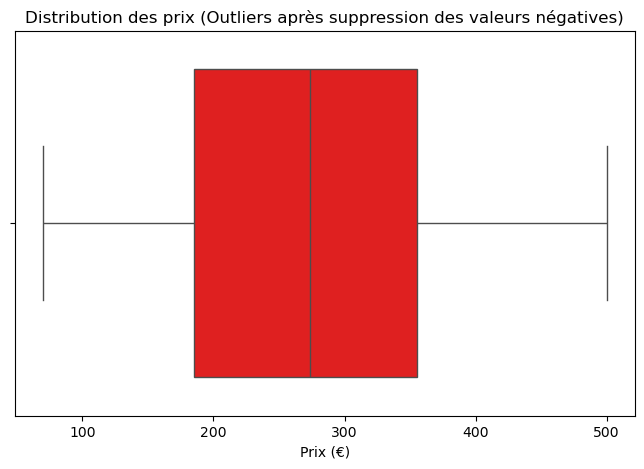

🔍 Nombre total d'outliers détectés : 0
📉 Seuil inférieur : -70.59 €
📈 Seuil supérieur : 610.84 €


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt


# Vérification des outliers avec un boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_synthetic_pricing_data["price"], color="red")
plt.title("Distribution des prix (Outliers après suppression des valeurs négatives)")
plt.xlabel("Prix (€)")
plt.show()

# Détection des outliers avec la méthode IQR
Q1 = df_synthetic_pricing_data["price"].quantile(0.25)
Q3 = df_synthetic_pricing_data["price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_synthetic_pricing_data[(df_synthetic_pricing_data["price"] < lower_bound) | 
                                     (df_synthetic_pricing_data["price"] > upper_bound)]

# Affichage des résultats
print(f"🔍 Nombre total d'outliers détectés : {outliers.shape[0]}")
print(f"📉 Seuil inférieur : {lower_bound:.2f} €")
print(f"📈 Seuil supérieur : {upper_bound:.2f} €")

### 📊 Analyse de la distribution des prix  

Le boxplot montre une répartition cohérente des prix des hôtels, avec une médiane autour de **200-300 €**, conforme à l'objectif fixé. La majorité des prix se situent entre **100 € et 500 €**, sans valeurs aberrantes détectées. Cette distribution reflète bien l’impact des facteurs influençant les prix, comme la disponibilité des chambres, la présence d’équipements (**parking, piscine**) et l’appartenance à une marque. ✅

## 2. Préparer les données pour l'entraînement : Séparer les données en train/test

In [30]:
from sklearn.model_selection import train_test_split

# Définir les features (X) et la variable cible (y)
X = df_synthetic_pricing_data.drop(columns=["index", "price", "hotel_id", "avatar_id"])  # Supprimer les identifiants inutiles
y = df_synthetic_pricing_data["price"]

# Division en jeu d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérifier la taille des ensembles
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5315, 12), (1329, 12), (5315,), (1329,))

## 3. Entraîner plusieurs modèles de Machine Learning

In [31]:
# Import des modèles
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialiser les modèles
models = {
    "Régression Linéaire": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42),
}

# Dictionnaire pour stocker les résultats
results = {}

# Entraînement et évaluation de chaque modèle
for name, model in models.items():
    print(f"🔄 Entraînement du modèle : {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = rmse

# Afficher les résultats des modèles
results

🔄 Entraînement du modèle : Régression Linéaire...
🔄 Entraînement du modèle : Random Forest...
🔄 Entraînement du modèle : XGBoost...


{'Régression Linéaire': 62.90582838253569,
 'Random Forest': 55.37133228992034,
 'XGBoost': 56.15089453531057}

## 4. Optimiser les hyperparamètres avec GridSearchCV

In [32]:
from sklearn.model_selection import GridSearchCV

# Hyperparamètres pour Random Forest
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, scoring="neg_root_mean_squared_error", n_jobs=-1)
grid_rf.fit(X_train, y_train)

print(f"✅ Meilleurs paramètres pour Random Forest : {grid_rf.best_params_}")
print(f"🏆 Meilleur RMSE : {-grid_rf.best_score_}")

# Hyperparamètres pour XGBoost
param_grid_xgb = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 6, 10]
}

grid_xgb = GridSearchCV(xgb.XGBRegressor(random_state=42), param_grid_xgb, cv=3, scoring="neg_root_mean_squared_error", n_jobs=-1)
grid_xgb.fit(X_train, y_train)

print(f"✅ Meilleurs paramètres pour XGBoost : {grid_xgb.best_params_}")
print(f"🏆 Meilleur RMSE : {-grid_xgb.best_score_}")

✅ Meilleurs paramètres pour Random Forest : {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
🏆 Meilleur RMSE : 50.69765850104975
✅ Meilleurs paramètres pour XGBoost : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
🏆 Meilleur RMSE : 49.143262785105684


## 5. Visualiser les résultats

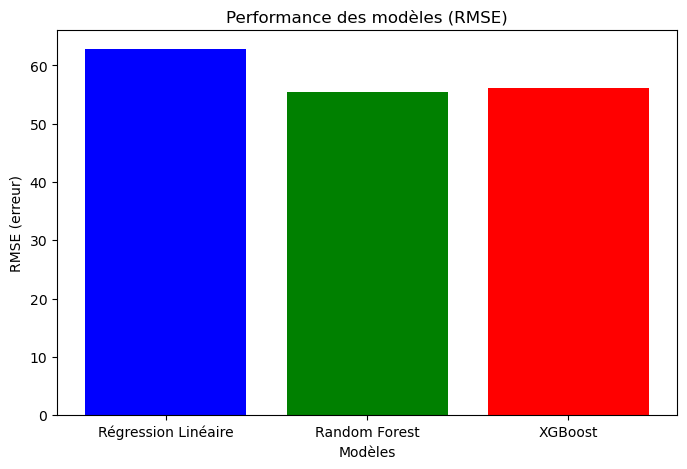

In [33]:
import matplotlib.pyplot as plt

# Afficher les performances des modèles
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=["blue", "green", "red"])
plt.title("Performance des modèles (RMSE)")
plt.xlabel("Modèles")
plt.ylabel("RMSE (erreur)")
plt.show()

## 6. sauvegardons le meilleur modèle dans le dossier backend/model

In [34]:
import joblib
import os

# Créer le dossier s'il n'existe pas
model_dir = "backend/model"
os.makedirs(model_dir, exist_ok=True)

# Sélectionner le meilleur modèle en fonction du RMSE
best_model_name = min(results, key=results.get)  # Modèle avec le plus petit RMSE
best_model = models[best_model_name]

# Définir le chemin de sauvegarde du modèle
model_filename = f"{best_model_name.replace(' ', '_').lower()}_model.pkl"
model_path = os.path.join(model_dir, model_filename)

# Sauvegarder le modèle
joblib.dump(best_model, model_path)

print(f"✅ Le modèle '{best_model_name}' a été sauvegardé sous : {model_path}")

✅ Le modèle 'Random Forest' a été sauvegardé sous : backend/model\random_forest_model.pkl
